# 2. 
- 2.1) “images/png/printedtext.png” görüntüsündeki kararmanın giderilmesi için herhangi birgörüntü iyileştirme tekniği 
  * lineer dönüşüm, 
  * gamma veya log dönüşümü, 
  * yerel veya genel histogram eşitleme
     deneyip ikinci bir görüntü elde ediniz. 
- 2.2) İlk ve ikinci görüntünün histogramlarını bastırıp analiz ediniz. 
- 2.3) İyileştirilmiş görüntüde uygun bir eşik değeri belirleyip görüntüyü bölütleyiniz. 
- 2.4) Uyguladığınız iyileştirme yaklaşımının harfleri arka plandan ayırmada ne derece etkin olduğunu değerlendiriniz.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from utils import show_hist
from utils import img_read

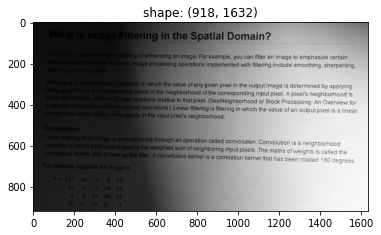

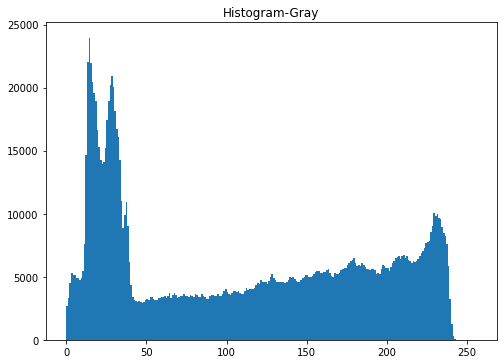

In [2]:
img_org = img_read('../images/png/printedtext.png', ret_gray=True)
show_hist(img_org)

## 2.1) “images/png/printedtext.png” görüntüsündeki kararmanın giderilmesi için herhangi birgörüntü iyileştirme tekniği 
* ### lineer dönüşüm, 
* ### gamma veya log dönüşümü, 
* ### yerel veya genel histogram eşitleme

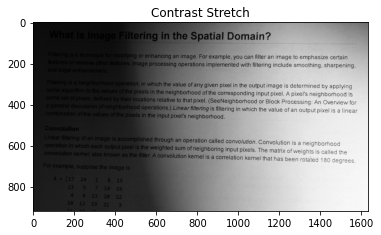

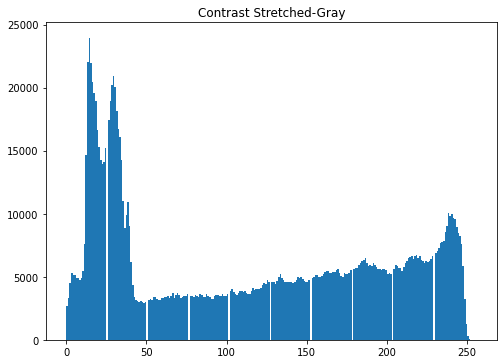

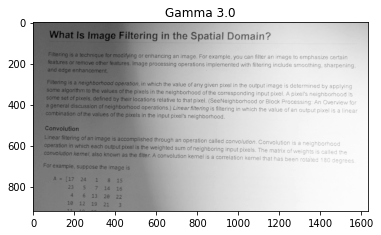

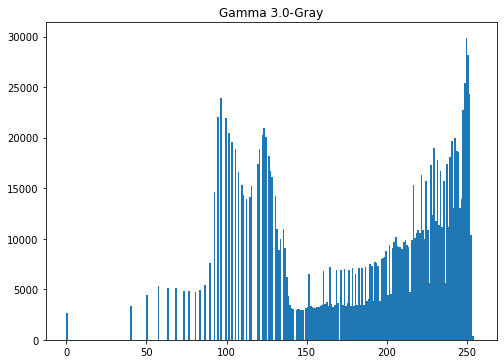

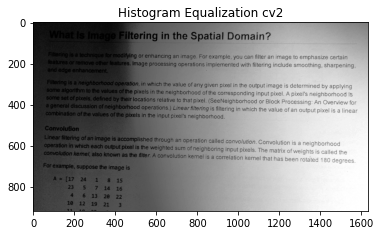

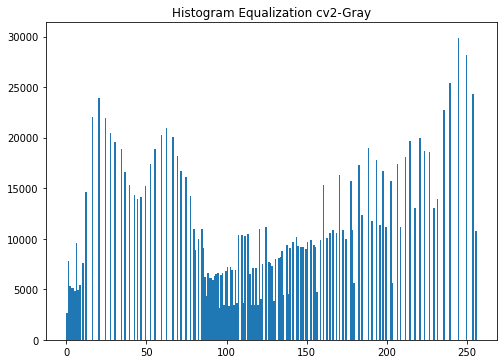

In [41]:
img = np.copy(img_org)

# Linear Transformation
# Contrast stretching
# https://www.geeksforgeeks.org/piece-wise-linear-transformation/
def contrast_stretch(img):
    out = (img-img.min())/(img.max()-img.min())
    return ((out) * 255).astype(np.uint8) 

img = contrast_stretch(img)

plt.imshow(img, cmap='gray')
plt.title('Contrast Stretch')
show_hist(img, title='Contrast Stretched', cumulative=False)
plt.show()


# Gamma Transformation
def adjust_gamma(image, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table
	return np.take(table, image)

gamma = 3.
img = adjust_gamma(img, gamma)

plt.imshow(img, cmap='gray')
plt.title(f'Gamma {gamma}')
show_hist(img, title=f'Gamma {gamma}')
plt.show()


# Histogram Equalization
img = cv2.equalizeHist(img)
plt.imshow(img, cmap="gray")
plt.title('Histogram Equalization cv2')
show_hist(img, title='Histogram Equalization cv2')
plt.show()


##    2.2) İlk ve ikinci görüntünün histogramlarını bastırıp analiz ediniz. 

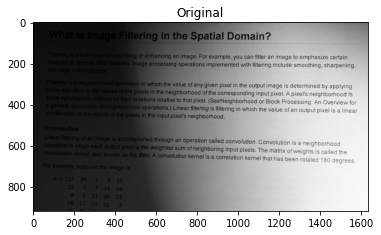

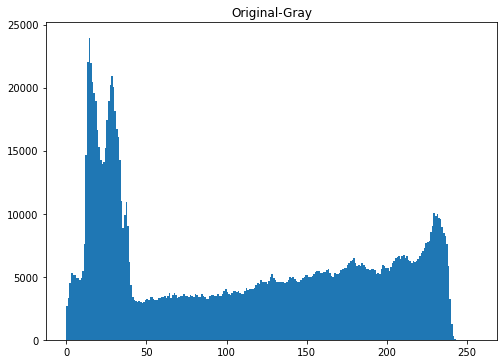

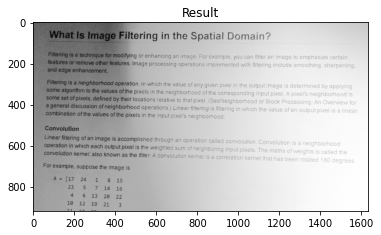

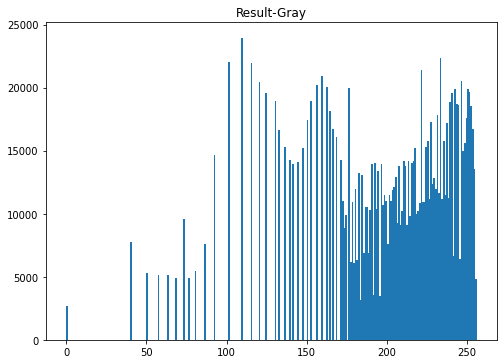

In [38]:
plt.imshow(img_org, cmap='gray')
plt.title('Original')
show_hist(img_org, title='Original')
plt.show()

plt.imshow(img, cmap='gray')
plt.title('Result')
show_hist(img, title='Result')
plt.show()

##    2.3) İyileştirilmiş görüntüde uygun bir eşik değeri belirleyip görüntüyü bölütleyiniz. 


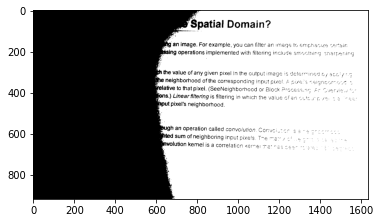

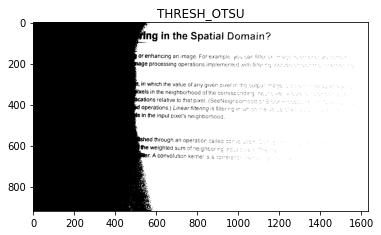

In [39]:
## Thresholding  
def threshold_img(img, method="mean"):
    if isinstance(method, int):
        th_value = method
    elif method == "mean":
        th_value = img.mean()
    elif method == "median":
        th_value = np.median(img)
    
    return ((img > th_value)*255).astype(np.uint8)

img_th = threshold_img(img, method="mean")
plt.imshow(img_th, cmap='gray')
plt.show()

th , img_th = cv2.threshold(img, thresh=0, maxval= 255, type=cv2.THRESH_OTSU)
plt.imshow(img_th, cmap='gray')
plt.title('THRESH_OTSU')
plt.show()


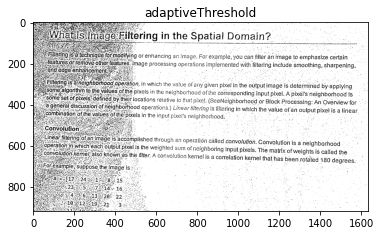

In [40]:
img_th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2) #imgf contains Binary image
plt.title('adaptiveThreshold')
plt.imshow(img_th, cmap='gray')
plt.show()

##    2.4) Uyguladığınız iyileştirme yaklaşımının harfleri arka plandan ayırmada ne derece etkin olduğunu değerlendiriniz.

* Lineer dönüşüm olarak kontrast esnetme uygulandı.
* Karanlığı azaltmak için gamma düzeltmesi,
* Işık eşitsizliğini normalize etmek için histogram eşitleme uygulandı.

* Son olarak sonra netliği artırmak için thresholdlama uygulandı. Burada threshold metodonun adaptif seçilmesi ile threshold değerinin yanlış seçilmesi durumunda içerik kaybı önlendi.

* İşlemler sonucunda görseldeki yazının okunurluğunda gelişme oldu.

Yazının görsele daha doğru hizalanması için skew correction uygulanabilir.

## Bonus)
### Apply superres
### https://www.pyimagesearch.com/2020/11/09/opencv-super-resolution-with-deep-learning/ 

In [8]:
# extract the model name and model scale from the file path
import time

model_path = './LapSRN_x2.pb'
modelName = model_path.split(os.path.sep)[-1].split("_")[0].lower()
modelScale = model_path.split("_x")[-1]
modelScale = int(modelScale[:modelScale.find(".")])

# initialize OpenCV's super resolution DNN object, load the super
# resolution model from disk, and set the model name and scale
print(f"[INFO] loading super resolution model: {model_path}")
print(f"[INFO] model name: {modelName}")
print(f"[INFO] model scale: {modelScale}")
sr = cv2.dnn_superres.DnnSuperResImpl_create()
sr.readModel(model_path)
sr.setModel(modelName, modelScale)

[INFO] loading super resolution model: ./LapSRN_x2.pb
[INFO] model name: lapsrn
[INFO] model scale: 2


[INFO] super resolution took 6.974104 seconds
[INFO] w: 3264, h: 1836


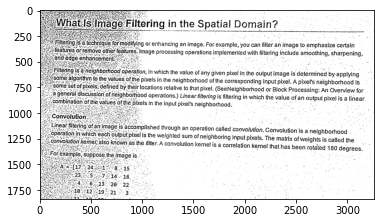

In [11]:
# use the super resolution model to upscale the image, timing how
# long it takes
start = time.time()
upscaled = sr.upsample(img_th)
end = time.time()
print("[INFO] super resolution took {:.6f} seconds".format(
	end - start))
# show the spatial dimensions of the super resolution image
print("[INFO] w: {}, h: {}".format(upscaled.shape[1],
	upscaled.shape[0]))
plt.imshow(upscaled, cmap='gray')